# Baseline Model

In [1]:
import pickle
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
import pandas as pd
import xgboost as xgb
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings('once')

# Open token file
open_file = open('../data/preprocessed/tokens.pkl', "rb")
tokens = pickle.load(open_file)
open_file.close()

/Users/spencermoon/Documents/sentiment/env/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


For feature extraction, `Doc2Vec` model from Gensim is trained to convert tweets into vectors.

In [2]:
# Use Doc2Vec for training document embeddings
text = list(pd.DataFrame(tokens).iloc[:, 1])
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(text)]
d2v = Doc2Vec(vector_size=25, window=2, min_count=1, workers=4)
d2v.build_vocab(docs)
d2v.train(docs, total_examples=d2v.corpus_count, epochs=d2v.epochs)

# Save model
d2v.save('../model/d2v.model')

Once the model is ready, the entire dataset is converted into vectors.

In [3]:
# Create dataset with document embeddings as features
vectors = []

for t in text:
    vectors.append(d2v.infer_vector(t))

data = pd.concat([pd.DataFrame(tokens), pd.DataFrame(vectors)], axis=1, ignore_index=True)
# data.columns = ['label', 'text', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

`XGBoost` model is trained on the dataset with the `Doc2Vec` vectors as the predictors. Best parameters are chosen through cross validation, and the best score from cross validation is captured to estimate how the baseline model would perform in production.

In [4]:
from sklearn.model_selection import GridSearchCV

# Set parameters
grid_search_params = {
    'colsample_bytree': [0.6, 0.7],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100],
    'subsample': [0.5, 0.8],
    'max_depth': [4, 5]
}


# Split data into X and y
X = data.iloc[:, 2:]
y = data.iloc[:, 0]

# Search for best set of parameters
model = xgb.XGBClassifier(objective='binary:logistic')
grid = GridSearchCV(estimator=model, param_grid=grid_search_params, scoring='accuracy', cv=5, verbose=1)
grid.fit(X, y)
print("Best parameters found: ", grid.best_params_)
print("Highest accuracy found: ", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/spencermoon/Documents/sentiment/env/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/spencermoon/Documents/sentiment/env/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/spencermoon/Documents/sentiment/env/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/spencermoon/Documents/sentiment/env/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/spencermoon/Documents/sentiment/env/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

[0]	validation_0-error:0.39559	validation_1-error:0.39688
[1]	validation_0-error:0.37968	validation_1-error:0.38184
[2]	validation_0-error:0.37491	validation_1-error:0.37656
[3]	validation_0-error:0.37159	validation_1-error:0.37337
[4]	validation_0-error:0.36896	validation_1-error:0.37016
[5]	validation_0-error:0.36504	validation_1-error:0.36715
[6]	validation_0-error:0.36289	validation_1-error:0.36487
[7]	validation_0-error:0.36053	validation_1-error:0.36262
[8]	validation_0-error:0.35912	validation_1-error:0.36142
[9]	validation_0-error:0.35768	validation_1-error:0.36028
[10]	validation_0-error:0.35547	validation_1-error:0.35802
[11]	validation_0-error:0.35408	validation_1-error:0.35647
[12]	validation_0-error:0.35178	validation_1-error:0.35447
[13]	validation_0-error:0.34992	validation_1-error:0.35240
[14]	validation_0-error:0.34884	validation_1-error:0.35155
[15]	validation_0-error:0.34732	validation_1-error:0.35003
[16]	validation_0-error:0.34608	validation_1-error:0.34900
[17]	va

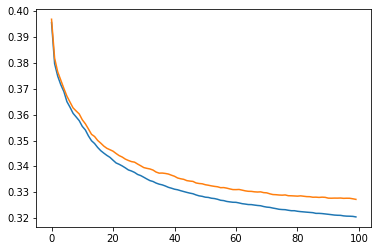

In [5]:
# Spilt into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# XGB Classifier
model = xgb.XGBClassifier(objective='binary:logistic', 
                          colsample_bytree=0.7,
                          learning_rate=0.2,
                          max_depth=5,
                          subsample=0.5,
                          seed=123)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
model.fit(X_train, y_train, eval_metric=['error'], eval_set=eval_set)
results = model.evals_result()

# Predict the labels of the test set: preds
predictions = model.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(predictions == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

# plot classification error
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')

In [8]:
# Save model
open_file = open('../model/xgboost.pkl', "wb")
pickle.dump(model, open_file)
open_file.close()